<a href="https://colab.research.google.com/github/100451218/Grupo42-Practica1/blob/main/Copia_de_Copia_de_Copia_de_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100451218- Sergi Vila
100451058-Daniel Obreo

# Análisis exploratorio de datos

Para el análisis exploratorio de datos vamos a observar:
1. Qué valores son siempre 0
2. Qué valores son constantes
3. Qué correlación hay entre columnas
4. Qué correlación hay entre las columnas y la salida
5. Hipótesis


### Importamos las librerías y cargamos los datos


In [54]:
!pip install pd
!pip install seaborn

import pandas as pd
#Importamos los dos conjuntos de datos.
disp_df = pd.read_csv("disp_st42ns1.txt.bz2",
 compression="bz2", 
 index_col=0)
comp_df = pd.read_csv("comp_st42ns1.txt.bz2", 
 compression="bz2", 
 index_col=0)
#print(disp_df['apcp_sf1_1'][0])
pd.set_option('display.max_columns', None)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Comprobamos valores a 0


In [55]:
for i in disp_df:
  if disp_df[i].sum()==0:
    print(i)
  """Con esta linea podemos ver las filas con todos los valores en 0, ya que 
  vemos después que no hay números negativos"""
  # print(i ,": ",disp_df[i].value_counts())
  for k in range(len(disp_df[i])):
    if disp_df[i][k]<0:
      """Si hubiera un número negativo se imprimiría hay"""
      print("Hay")

uswrf_s1_1


Hemos podido observar que la columna uswrf_s1_1 es inútil

### Comprobamos valores constantes


In [56]:
#También vamos a comprobar si el valor es constante
"""print(disp_df["uswrf_s1_1"].nunique())"""
#Cómo hemos dicho antes, sólo hay un número único
for i in disp_df:
  if disp_df[i].nunique()==1:
    print(i)

uswrf_s1_1


Sale la misma columna ya que es constante en 0


### Comprobamos correlación entre columnas

Vamos a mirar para un umbral de 0.95

In [57]:
list=[]
for i in disp_df:
  for k in disp_df:
    """print(disp_df[i].corr(disp_df[k]))"""
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.95<=disp_df[i].corr(disp_df[k])<=0.95 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(list)

dlwrf_s1_1 ,  dlwrf_s2_1  :  0.9703837115052251
dlwrf_s1_1 ,  dlwrf_s3_1  :  0.9618644397452982
dlwrf_s2_1 ,  dlwrf_s3_1  :  0.9941484165303395
dlwrf_s3_1 ,  dlwrf_s4_1  :  0.9714313070426391
dlwrf_s3_1 ,  dlwrf_s5_1  :  0.9628906707604897
dlwrf_s4_1 ,  dlwrf_s5_1  :  0.9976436933451329
dswrf_s2_1 ,  dswrf_s3_1  :  0.9571667754289556
dswrf_s2_1 ,  uswrf_s2_1  :  0.9942986544231128
dswrf_s3_1 ,  uswrf_s2_1  :  0.964297736448637
dswrf_s3_1 ,  uswrf_s3_1  :  0.9620365523744548
dswrf_s4_1 ,  dswrf_s5_1  :  0.9846653842283272
pres_ms1_1 ,  pres_ms2_1  :  0.9861133756671324
pres_ms1_1 ,  pres_ms3_1  :  0.9501939300486043
pres_ms2_1 ,  pres_ms3_1  :  0.9855174686825475
pres_ms3_1 ,  pres_ms4_1  :  0.9852195616314235
pres_ms3_1 ,  pres_ms5_1  :  0.9503729775888822
pres_ms4_1 ,  pres_ms5_1  :  0.983982500363903
pwat_ea1_1 ,  pwat_ea2_1  :  0.987536536664307
pwat_ea1_1 ,  pwat_ea3_1  :  0.963475239218834
pwat_ea2_1 ,  pwat_ea3_1  :  0.9888327077899062
pwat_ea2_1 ,  pwat_ea4_1  :  0.9641615077236

En list tenemos todas las columnas altamente correlacionadas


In [58]:
#display(disp_df)
import numpy as np
from numpy.lib.function_base import disp
import pandas as pd
for i in disp_df:
  for k in range(len(disp_df[i])):
    if disp_df[i][k]==np.nan:
      print(i)

####Normalizamos los datos


In [59]:
from sklearn.preprocessing import RobustScaler
pd.set_option('display.max_rows', None)
#display(disp_df.var())
X=disp_df.values
robust = RobustScaler()
scaled_values = robust.fit_transform(X)
scaled_matrix = pd.DataFrame(scaled_values)
#Creemos que necesitamos hacer la normalización más adelante y al splited data
index = 0
for i in disp_df:
  print(i, scaled_matrix[index].std())
  index += 1

apcp_sf1_1 35.34527131609055
apcp_sf2_1 66.53638839905511
apcp_sf3_1 53.13619594585077
apcp_sf4_1 0.6902865527001909
apcp_sf5_1 388.61446765566023
dlwrf_s1_1 0.5690586015004552
dlwrf_s2_1 0.5604280980745557
dlwrf_s3_1 0.5599100960180365
dlwrf_s4_1 0.5547244234757622
dlwrf_s5_1 0.5511972663349181
dswrf_s1_1 0.11261614127640085
dswrf_s2_1 0.5244378685307185
dswrf_s3_1 0.542719374275947
dswrf_s4_1 0.5831412440294939
dswrf_s5_1 0.5448927304212977
pres_ms1_1 0.8013205554909132
pres_ms2_1 0.8000760839594527
pres_ms3_1 0.8045473701643405
pres_ms4_1 0.8150731212020463
pres_ms5_1 0.8075559976191413
pwat_ea1_1 0.6082063140958146
pwat_ea2_1 0.6072553678220067
pwat_ea3_1 0.6039178374017136
pwat_ea4_1 0.5997911606743963
pwat_ea5_1 0.5956526216702805
spfh_2m1_1 0.5815653017261748
spfh_2m2_1 0.5690428651413918
spfh_2m3_1 0.5708540110551112
spfh_2m4_1 0.5792918254933966
spfh_2m5_1 0.5772227939267285
tcdc_ea1_1 3.7599959314426297
tcdc_ea2_1 4.285342587457867
tcdc_ea3_1 5.05894175114318
tcdc_ea4_1 4.821

<ipython-input-60-5e3f291a3ca6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(disp_df["apcp_sf5_1"])


<Axes: xlabel='apcp_sf5_1', ylabel='Density'>

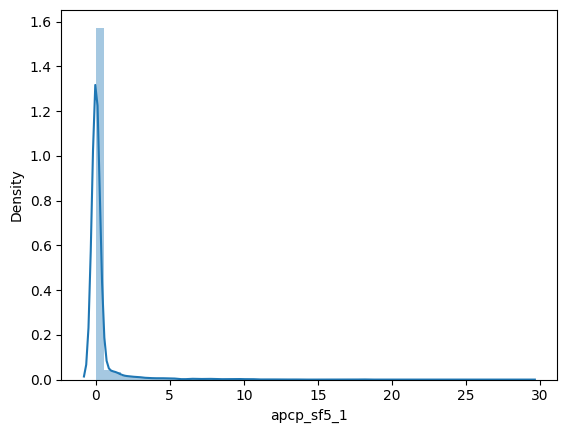

In [60]:
import seaborn

seaborn.distplot(disp_df["apcp_sf5_1"])
#seaborn.distplot(scaled_matrix[4])
#seaborn.boxplot(scaled_matrix[4])

###Comprobamos la correlación con la salida


In [61]:
lista_salida=[]
for i in disp_df:
    print("correlación salida con ", i, disp_df[i].corr(disp_df["salida"]))
    if disp_df[i].corr(disp_df["salida"])>0.85 or disp_df[i].corr(disp_df["salida"])<-0.85:
      lista_salida.append(i)

correlación salida con  apcp_sf1_1 -0.16213021417225146
correlación salida con  apcp_sf2_1 -0.22693195305515088
correlación salida con  apcp_sf3_1 -0.25482657684032034
correlación salida con  apcp_sf4_1 -0.24638359175743108
correlación salida con  apcp_sf5_1 -0.251709690802096
correlación salida con  dlwrf_s1_1 0.36538671151738716
correlación salida con  dlwrf_s2_1 0.3324084177854513
correlación salida con  dlwrf_s3_1 0.37153024058007206
correlación salida con  dlwrf_s4_1 0.4618079055814155
correlación salida con  dlwrf_s5_1 0.47720762545798917
correlación salida con  dswrf_s1_1 0.13360641876924823
correlación salida con  dswrf_s2_1 0.8246218105528994
correlación salida con  dswrf_s3_1 0.8802982839969848
correlación salida con  dswrf_s4_1 0.875697345874555
correlación salida con  dswrf_s5_1 0.8773294983106668
correlación salida con  pres_ms1_1 -0.2854430805293465
correlación salida con  pres_ms2_1 -0.2922649346561904
correlación salida con  pres_ms3_1 -0.302003504480284
correlación sal

## Hipótesis



Podemos ver que la columna "uswrf_s1_1" es inútil.
También tenemos en la variable "lista" el array que incluye las combinaciones de variables altamente relacionadas unas con otras. Por último en lista_salida tenemos las columnas altamente correlacionadas con la salida.
Hemos decidido por lo cual reducir el dataset quitando la columna inútil, también vamos a minimizar el número de variables.
No vamos a borrar las variables con baja correlación con la salida ya que dicha correlación es sólo lineal así que al eliminarla podriamos quitar variables altamente correlacionadas no linearmente.

In [62]:
disp_df = disp_df.drop(columns=['uswrf_s1_1'])
"""list_elimino =[]
list_dejo=[]

for i in list:
  if i[0] not in list_elimino and i[1] not in list_elimino:
    #Queremos eliminar si no vamos a eliminar
    list_elimino.append(i[0])
    disp_df.drop(i[0], axis=1, inplace=True)

list=[]
for i in disp_df:
  for k in disp_df:
    #print(disp_df[i].corr(disp_df[k]))
    #Esto nos sirve para saber que 1 es el máximo
    if i!=k and not -0.90<=disp_df[i].corr(disp_df[k])<=0.90 and i!="uswrf_s1_1" and k!="uswrf_s1_1":
      if [i,k] not in list and [k,i] not in list:
        list.append([i,k])
        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))
      
print(list)
"""

'list_elimino =[]\nlist_dejo=[]\n\nfor i in list:\n  if i[0] not in list_elimino and i[1] not in list_elimino:\n    #Queremos eliminar si no vamos a eliminar\n    list_elimino.append(i[0])\n    disp_df.drop(i[0], axis=1, inplace=True)\n\nlist=[]\nfor i in disp_df:\n  for k in disp_df:\n    #print(disp_df[i].corr(disp_df[k]))\n    #Esto nos sirve para saber que 1 es el máximo\n    if i!=k and not -0.90<=disp_df[i].corr(disp_df[k])<=0.90 and i!="uswrf_s1_1" and k!="uswrf_s1_1":\n      if [i,k] not in list and [k,i] not in list:\n        list.append([i,k])\n        print(i,", ",k," : ",disp_df[i].corr(disp_df[k]))\n      \nprint(list)\n'

# Métodos básicos


Definición de las variables básicas: X, y, X_train, X_test, y_train e y_test

In [63]:
from sklearn.model_selection import train_test_split
X = disp_df.loc[:, disp_df.columns != 'salida']
y = disp_df["salida"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3650, test_size=730, shuffle=False)
print(disp_df["salida"].describe())
best_method=[{},{}]
#Sin ajuste, Con ajuste

count    4.380000e+03
mean     1.807402e+07
std      7.898549e+06
min      3.291000e+05
25%      1.240575e+07
50%      1.825620e+07
75%      2.505450e+07
max      3.232680e+07
Name: salida, dtype: float64


## Modelo "dummy"

In [64]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)

y_pred_dummy = regr_mean.predict(X_test)

rmse_dummy = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)
print(f"RMSE del modelo 'dummy': {rmse_dummy}")
print(f"MAE del modelo 'dummy': {mae_dummy}")
best_method[0]["Dummy_RMSE"]=rmse_dummy
best_method[0]["Dummy_MAE"]=mae_dummy

RMSE del modelo 'dummy': 7668080.08840558
MAE del modelo 'dummy': 6551109.50024395


##KNN

Sin definir los hiperparámetros

In [65]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import RobustScaler


# X, y, X_train, X_test, y_train, y_test ya están definidos en el anterior código

# We obtain predictions on the test set
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN regressor
knn = KNeighborsRegressor()

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)
# Predict on the scaled test data
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
mae_knn = mean_absolute_error(y_test, y_pred)
print(f"RMSE of the knn: {rmse_knn}")
print(f"MAE of the knn: {mae_knn}")
print("Hey:", metrics.accuracy_score(y_pred, y_test))
# Podemos observar que el RMSE y el MAE es muy alto, unos 3-4 millones, 
# pero tiene sentido si vemos que la media de los valores es del orden
# de los 18 millones; por lo que el error no es tan grande, 
# son las unidades lo que aumenta ese valor.
best_method[0]["KNN_RMSE"]=rmse_knn
best_method[0]["KNN_MAE"]=mae_knn

RMSE of the knn: 4597719.152116772
MAE of the knn: 3253112.8767123288
Hey: 0.0


Ajuste de hiperparámetros

In [66]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import PredefinedSplit

# Search space
param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': range(2,16,2),
              'metric': ['cityblock', 'cosine', 'euclidean', 'manhattan', 'minkowski']}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))


# Definition of a 2-step process that self-adjusts 2 hyperpars
knn_hyper = GridSearchCV(KNeighborsRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(42)
knn_hyper.fit(X_train_scaled, y_train)
y_test_pred = knn_hyper.predict(X_test_scaled)
rmse_knn_hyper = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_knn_hyper = mean_absolute_error(y_test, y_test_pred)
print(f"RMSE de KNN con ajuste de hiperparámetros: {rmse_knn_hyper}")
print(f"MAE de KNN con ajuste de hiperparámetros: {mae_knn_hyper}")
print(knn_hyper.best_params_)

# At this point, regr contains the model with the best hyper-parameters found by gridsearch
# and trained on the complete X_train
best_method[1]["KNN_RMSE"]=rmse_knn_hyper
best_method[1]["KNN_MAE"]=mae_knn_hyper

Fitting 1 folds for each of 70 candidates, totalling 70 fits
RMSE de KNN con ajuste de hiperparámetros: 3745656.2902732617
MAE de KNN con ajuste de hiperparámetros: 2654237.93209319
{'metric': 'cityblock', 'n_neighbors': 12, 'weights': 'distance'}


##Árboles de regresión

Sin definir los hiperparámetros

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree



tree_regr = tree.DecisionTreeRegressor()
np.random.seed(42) # reproducibility
# We train it
tree_regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = tree_regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_tree = mean_absolute_error(y_test, y_test_pred)
print(f"RMSE of the tree: {rmse_tree}")
print(f"MAE of the tree: {mae_tree}")

# Pasa lo mismo que en el modelo de KNN, en el que tenemos
# valores muy altos en "salida", y nos dan valores muy altos
# en el MAE y en RMSE; pero más bajos que la media, por lo 
# que el error es menor que la media, y el modelo es aceptable
best_method[0]["TREE_RMSE"]=rmse_tree
best_method[0]["TREE_MAE"]=mae_tree

RMSE of the tree: 4179665.0085206656
MAE of the tree: 2933939.178082192


Con ajustado de hiperparámetros

In [68]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import PredefinedSplit


# Search space
param_grid = {'max_depth': range(2,10,1),
              'min_samples_split': range(2,10,1)}

inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))
# Definition of a 2-step process that self-adjusts 2 hyperpars
tree_hyper = GridSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(42)
tree_hyper.fit(X_train, y_train)
y_test_pred = tree_hyper.predict(X_test)
rmse_tree_hyper = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_tree_hyper = mean_absolute_error(y_test, y_test_pred)
print(f"RMSE del árbol con ajuste de hiperparámetros: {rmse_tree_hyper}")
print(f"MAE del árbol con ajuste de hiperparámetros: {mae_tree_hyper}")
print(tree_hyper.best_params_)

# At this point, regr contains the model with the best hyper-parameters found by gridsearch
# and trained on the complete X_train
best_method[1]["TREE_RMSE"]=rmse_tree_hyper
best_method[1]["TREE_MAE"]=mae_tree_hyper

Fitting 1 folds for each of 64 candidates, totalling 64 fits
RMSE del árbol con ajuste de hiperparámetros: 3437575.123783922
MAE del árbol con ajuste de hiperparámetros: 2404698.5522945533
{'max_depth': 4, 'min_samples_split': 2}


##Regresor lineal

Sin definir los hiperparámetros

In [69]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
np.random.seed(42) # reproducibility
# We train it
LinReg.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = LinReg.predict(X_test)
# We compute accuracy
LinReg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
LinReg_mae = mean_absolute_error(y_test, y_test_pred)
print(f"RMSE del regresor lineal: {LinReg_rmse}")
print(f"MAE del regresor lineal: {LinReg_mae}")
best_method[0]["LR_RMSE"]=LinReg_rmse
best_method[0]["LR_MAE"]=LinReg_mae

RMSE del regresor lineal: 3052441.165997784
MAE del regresor lineal: 2090908.836342777


Con ajuste de hiperparámetros

In [70]:
from sklearn.linear_model import Ridge
# Search space
param_grid = {
 'alpha': np.arange(0.00, 10000000, 100000)}
inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))


# Definition of a 2-step process that self-adjusts 2 hyperpars
knn_hyper = GridSearchCV(Ridge(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(42)
knn_hyper.fit(X_train_scaled, y_train)
y_test_pred = knn_hyper.predict(X_test_scaled)
rmse_lr_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_lr_ridge = mean_absolute_error(y_test, y_test_pred)
print(f"RMSE de Linear Regressor con ajuste de hiperparámetros (Ridge): {rmse_lr_ridge}")
print(f"MAE de Linear Regressor con ajuste de hiperparámetros (Ridge): {mae_lr_ridge}")
print(knn_hyper.best_estimator_)

# At this point, regr contains the model with the best hyper-parameters found by gridsearch
# and trained on the complete X_train
best_method[1]["RIDGE_RMSE"]=rmse_lr_ridge
best_method[1]["RIDGE_MAE"]=mae_lr_ridge

Fitting 1 folds for each of 100 candidates, totalling 100 fits
RMSE de Linear Regressor con ajuste de hiperparámetros (Ridge): 3052441.1659894427
MAE de Linear Regressor con ajuste de hiperparámetros (Ridge): 2090908.8363355985
Ridge(alpha=0.0)


In [71]:
from sklearn.linear_model import Lasso

# Search space
"""
param_grid = {
 'alpha': np.concatenate((np.arange(0.00, 1.0, 0.01),np.arange(0.00, 100.0, 1),np.arange(0.00, 10000.0, 100),np.arange(0.00, 1000000.0, 10000),np.arange(0.00, 100000000.0, 1000000))),
}
"""
param_grid = {
 'alpha': np.arange(0.00, 1000000, 100000)}
inner = PredefinedSplit(([-1] * 2920) + ([0] * 730))


# Definition of a 2-step process that self-adjusts 2 hyperpars
knn_hyper = GridSearchCV(Lasso(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(42)
knn_hyper.fit(X_train_scaled, y_train)
y_test_pred = knn_hyper.predict(X_test_scaled)
rmse_lr_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae_lr_lasso = mean_absolute_error(y_test, y_test_pred)
print(f"RMSE de Linear Regressor con ajuste de hiperparámetros (Lasso): {rmse_knn_hyper}")
print(f"MAE de Linear Regressor con ajuste de hiperparámetros (Lasso): {mae_knn_hyper}")
print(knn_hyper.best_estimator_)

# At this point, regr contains the model with the best hyper-parameters found by gridsearch
# and trained on the complete X_train
best_method[1]["LASSO_RMSE"]=rmse_lr_lasso
best_method[1]["LASSO_MAE"]=mae_lr_lasso

Fitting 1 folds for each of 10 candidates, totalling 10 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.278e+16, tolerance: 1.859e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet

RMSE de Linear Regressor con ajuste de hiperparámetros (Lasso): 3745656.2902732617
MAE de Linear Regressor con ajuste de hiperparámetros (Lasso): 2654237.93209319
Lasso(alpha=0.0)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+16, tolerance: 2.304e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


#Conclusiones métodos básicos


En la comparación vamos a primero ver la clasificación con hiperparametros por omisión: 
Mejor RMSE:
Mejor MAE: 
Mejor tiempo:


In [80]:
print("Errores sin ajuste de híperparámetros\n")
for i in best_method[0]:
  print(i+": \t",best_method[0][i])

print("\nErrores con ajuste de híperparámetros\n")
for i in best_method[1]:
  print(i+": \t",best_method[1][i])


Errores sin ajuste de híperparámetros

Dummy_RMSE: 	 7668080.08840558
Dummy_MAE: 	 6551109.50024395
KNN_RMSE: 	 4597719.152116772
KNN_MAE: 	 3253112.8767123288
TREE_RMSE: 	 4179665.0085206656
TREE_MAE: 	 2933939.178082192
LR_RMSE: 	 3052441.165997784
LR_MAE: 	 2090908.836342777

Errores con ajuste de híperparámetros

KNN_RMSE: 	 3745656.2902732617
KNN_MAE: 	 2654237.93209319
TREE_RMSE: 	 3437575.123783922
TREE_MAE: 	 2404698.5522945533
RIDGE_RMSE: 	 3052441.1659894427
RIDGE_MAE: 	 2090908.8363355985
LASSO_RMSE: 	 3047675.695198696
LASSO_MAE: 	 2067323.268974352


En ambos casos podemos observar que el método con mínimo error es la regressión lineal. También podemos ver que el método Dummy es el que mayor error tiene, como era de esperar.

También y como era predecible, el ajuste de hiperparámetros siempre supone una mejora sustancial. Ya que los valores por omisión emplean unos hiperparámetros por defecto, resulta obvio que estos no van a ser los mejores para el caso particular en el que nos encontramos.